In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 14.3 MB/s 
     |████████████████████████████████| 9.5 MB 62.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as SNS
%matplotlib inline

import itertools

In [3]:
data = pd.read_csv('/content/drive/MyDrive/시계열_교안/1주차/AirPassengers.csv의 사본')

In [4]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
data = data.rename(columns={'Month': 'month', '#Passengers': 'Passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')
data

,Passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


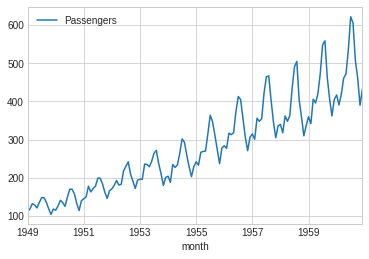

In [6]:
data.plot()

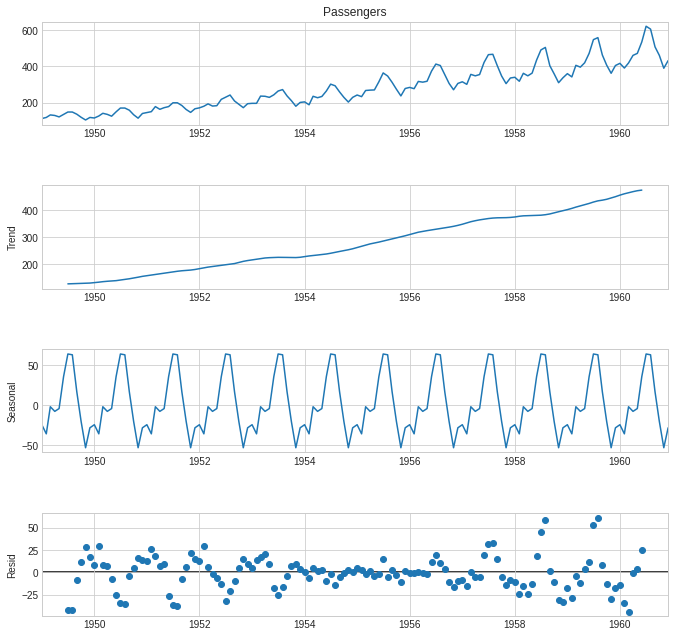

In [7]:
## Decomposition
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

In [8]:
help(decomposition)

Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |  
 |  Results class for seasonal decompositions
 |  
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |      
 |      Parameters
 |      ----------
 |      

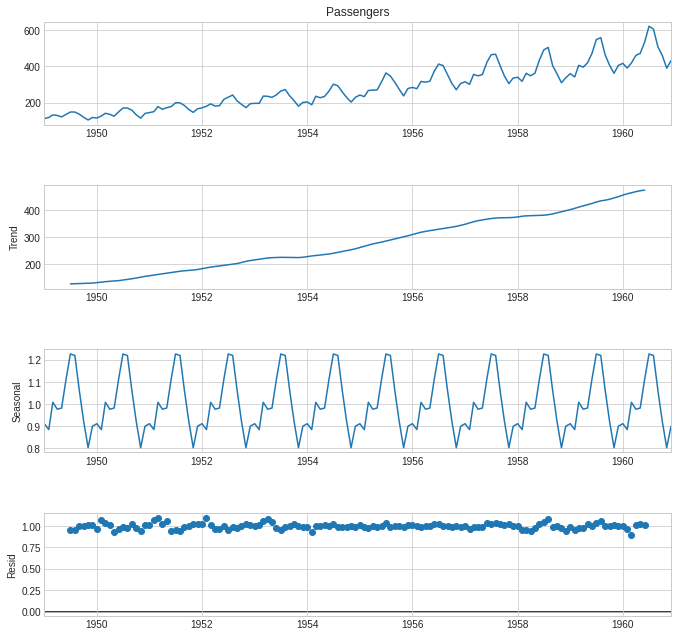

In [9]:
## Decomposition
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

In [10]:
decomposition.resid.dropna()

month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64

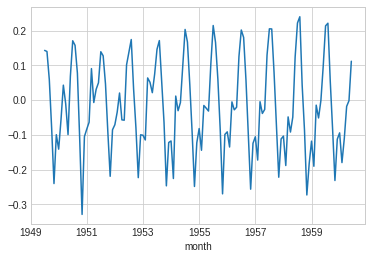

In [11]:
## detrend

((data['Passengers'] - decomposition.trend) /data['Passengers'] ).plot()

In [12]:
import numpy as np
log_data = np.log(data.copy())

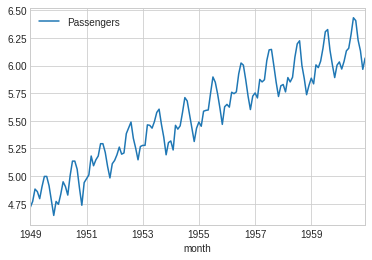

In [13]:
log_data.plot()

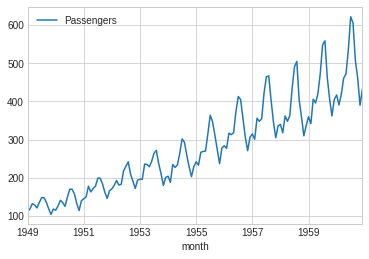

In [14]:
data.plot()

In [15]:
# split => 시계열에서는 다르게 => shuffle=False
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


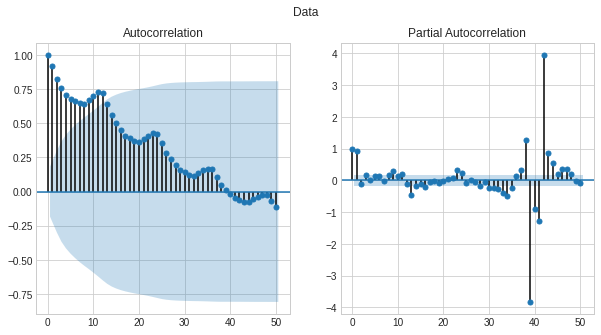

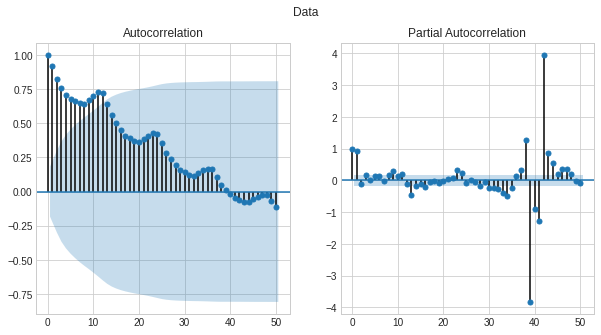

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Data')

sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=50, ax=ax[1])

In [17]:
import numpy as np
log_train_data = np.log(train_data.copy())
log_test_data = np.log(test_data.copy())
diff_train_data = log_train_data['Passengers'].diff() # 차분 수행 (xt - xt-1)
diff_train_data.dropna(inplace=True)

diff_train_data

month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-03-01    0.129593
1958-04-01   -0.039442
1958-05-01    0.042200
1958-06-01    0.180943
1958-07-01    0.121098
Name: Passengers, Length: 114, dtype: float64

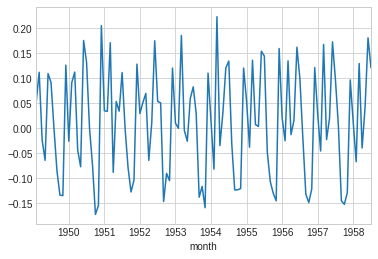

In [18]:
diff_train_data.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


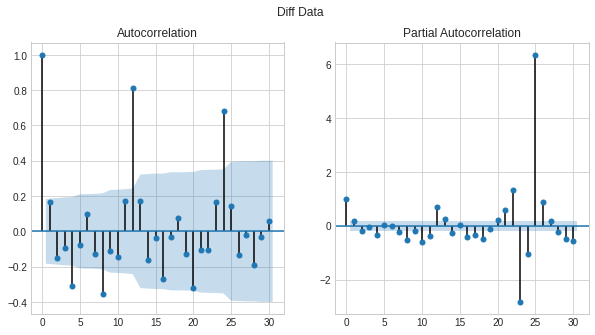

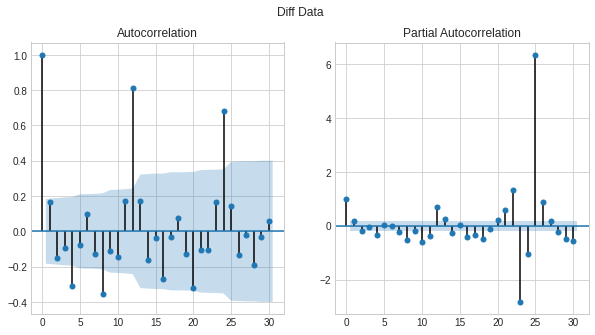

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Diff Data')

sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1])

In [20]:
                                          # p, d, q
model = ARIMA(log_train_data.values, order=(1,0,0)) # AR(1)
history = model.fit()
history.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                     ARMA(1, 0)   Log Likelihood                  95.552
Method:                       css-mle   S.D. of innovations              0.104
Date:                Fri, 23 Jul 2021   AIC                           -185.104
Time:                        12:18:51   BIC                           -176.869
Sample:                             0   HQIC                          -181.762
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4305      0.345     15.748      0.000       4.755       6.106
ar.L1.y        0.9791      0.020     49.853      0.000       0.941       1.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0213           +0.0000j            1.0213            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
p = range(0, 3) # 0,1,2
d = range(0, 2) # 0,1
q = range(0, 3) # 0,1,2

pdq = list(itertools.product(p, d, q))

aic = []

for i in pdq:
  model = ARIMA(log_train_data.values, order=(i))
  model_fit = model.fit()
  aic.append(model_fit.aic)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

In [22]:
aic

[109.11660581011654,
 -20.552278094200346,
 -86.22403725018427,
 -189.73338222563518,
 -192.64088844095977,
 -206.74907651973956,
 -185.10402740507953,
 -189.4980192567961,
 -191.59127488667735,
 -191.0347351180667,
 -196.70155992570358,
 -215.88465391482794,
 -187.6128170660764,
 -192.74074639308623,
 -179.8948182636321,
 -192.8435541361439,
 -217.49944810181523,
 -214.31318162998355]

In [23]:
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 1), -217.49944810181523)]

In [24]:
opt_model = ARIMA(log_train_data.values, order=optimal[0][0])
opt_model_fit = opt_model.fit()

opt_model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 113.750
Method:                       css-mle   S.D. of innovations              0.088
Date:                Fri, 23 Jul 2021   AIC                           -217.499
Time:                        12:18:56   BIC                           -203.818
Sample:                             1   HQIC                          -211.947
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.001     19.481      0.000       0.010       0.012
ar.L1.D.y      0.9467      0.087     10.920      0.000       0.777       1.117
ar.L2.D.y     -0.3812      0.086     -4.413      0.000      -0.550      -0.212
ma.L1.D.y     -1.0000      0.024    -42.464      0.000      -1.046      -0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2419           -1.0398j            1.6197           -0.1109
AR.2            1.2419           +1.0398j            1.6197            0.1109
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
pred = opt_model_fit.forecast(len(log_test_data))

In [26]:
pred

(array([6.17785693, 6.11885492, 6.07483496, 6.06040409, 6.06827557,
        6.08598293, 6.10450126, 6.12003817, 6.13244335, 6.14302004,
        6.15305937, 6.16328691, 6.17389749, 6.18479894, 6.19582979,
        6.20687226, 6.2178764 , 6.22883985, 6.23977936, 6.25071172,
        6.26164645, 6.27258614, 6.28352962, 6.2944748 , 6.30542015,
        6.316365  , 6.32730933, 6.33825334, 6.34919726]),
 array([0.08764941, 0.12070184, 0.12887327, 0.1293527 , 0.12952484,
        0.12995435, 0.1301675 , 0.13020256, 0.13020256, 0.13020754,
        0.13021209, 0.13021348, 0.13021358, 0.1302136 , 0.13021366,
        0.13021369, 0.13021369, 0.13021369, 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ]),
 array([[6.00606725, 6.34964661],
        [5.88228365, 6.35542619],
        [5.822248  , 6.32742192],
        [5.80687746, 6.31393073],
        [5.81441155, 6.32213958],
        [5.83127708, 6.34068878],


In [27]:
predicted_values = np.exp(pred[0])

In [28]:
pred_lb = np.exp(pred[2][:,0])

In [29]:
pred_ub = np.exp(pred[2][:,1])

In [30]:
pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

In [31]:
pred_index

[Timestamp('1958-08-01 00:00:00'),
 Timestamp('1958-09-01 00:00:00'),
 Timestamp('1958-10-01 00:00:00'),
 Timestamp('1958-11-01 00:00:00'),
 Timestamp('1958-12-01 00:00:00'),
 Timestamp('1959-01-01 00:00:00'),
 Timestamp('1959-02-01 00:00:00'),
 Timestamp('1959-03-01 00:00:00'),
 Timestamp('1959-04-01 00:00:00'),
 Timestamp('1959-05-01 00:00:00'),
 Timestamp('1959-06-01 00:00:00'),
 Timestamp('1959-07-01 00:00:00'),
 Timestamp('1959-08-01 00:00:00'),
 Timestamp('1959-09-01 00:00:00'),
 Timestamp('1959-10-01 00:00:00'),
 Timestamp('1959-11-01 00:00:00'),
 Timestamp('1959-12-01 00:00:00'),
 Timestamp('1960-01-01 00:00:00'),
 Timestamp('1960-02-01 00:00:00'),
 Timestamp('1960-03-01 00:00:00'),
 Timestamp('1960-04-01 00:00:00'),
 Timestamp('1960-05-01 00:00:00'),
 Timestamp('1960-06-01 00:00:00'),
 Timestamp('1960-07-01 00:00:00'),
 Timestamp('1960-08-01 00:00:00'),
 Timestamp('1960-09-01 00:00:00'),
 Timestamp('1960-10-01 00:00:00'),
 Timestamp('1960-11-01 00:00:00'),
 Timestamp('1960-12-

Text(0.5, 0.98, 'ARIMA (2, 1, 1) Prediction Result (r2 score: -0.2247709626490777')

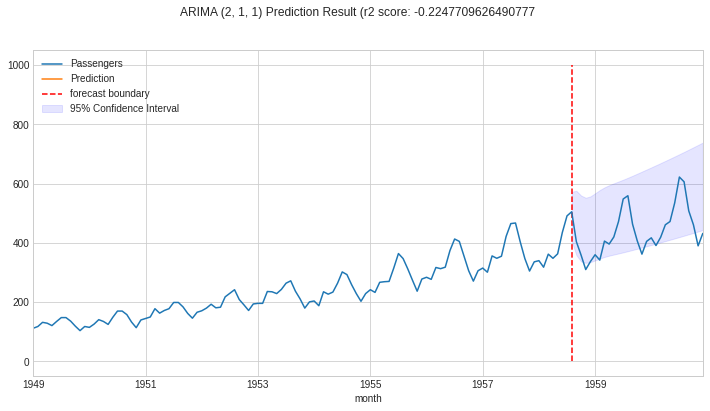

In [32]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

data.plot(ax=ax)
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

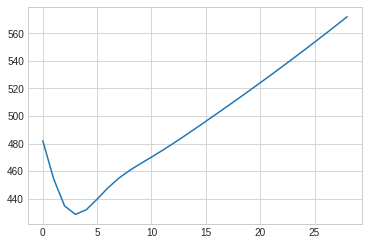

In [33]:
plt.plot(predicted_values)

In [34]:
opt_model = SARIMAX(log_train_data.values, order=(2,1,1), seasonal_order=(2,1,1,12))
opt_model_fit = opt_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
pred = opt_model_fit.get_forecast(len(test_data))

In [37]:
# pred = opt_model_fit.forecast(len(test_data))
# predicted_values = np.exp(pred[0])
# # pred_lb = np.exp(pred[2][:,0])
# # pred_ub = np.exp(pred[2][:,1])

# pred_index = list(test_data.index)
# r2 = r2_score(test_data, predicted_values)

# fig = plt.figure(figsize = (12,6))
# ax = fig.add_subplot(111)
# data.plot(ax=ax)
# ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='forecast boundary')
# ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
# ax.plot(pred_index, predicted_values, label='Prediction')
# ax.legend(loc='upper left')
# plt.suptitle(f"SARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# # plt.show()

In [38]:
auto_arima_model = auto_arima(log_train_data, start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12, seasonal=True,
                              d = 1, D=1,
                              max_P=3, maxQ=3,
                              trace=True,
                              error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-368.054, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-335.753, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-365.459, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-372.171, Time=0.88 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-345.397, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-370.441, Time=0.88 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-370.509, Time=1.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-366.182, Time=0.41 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-368.343, Time=2.12 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-364.570, Time=0.30 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-369.862, Time=0.80 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-370.229, Time=0.65 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-371.865, Time=0.47 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-368.574, Time=1.38 sec
 ARIMA(0,1,1)(0,1,1

In [39]:
pred.predicted_mean

array([6.17730575, 6.0463093 , 5.90386061, 5.77392766, 5.89239621,
       5.91428773, 5.86515057, 6.01019727, 5.98441435, 6.01079758,
       6.1794398 , 6.2913792 , 6.276928  , 6.14443609, 6.00074507,
       5.87151498, 5.98826814, 6.00978482, 5.95933062, 6.10468058,
       6.07790144, 6.10522132, 6.27527879, 6.38693401, 6.37345121,
       6.24017328, 6.09597151, 5.96669459, 6.08212374])

Text(0.5, 0.98, 'ARIMA (2, 1, 1) Prediction Result (r2 score: 0.9617405784256837')

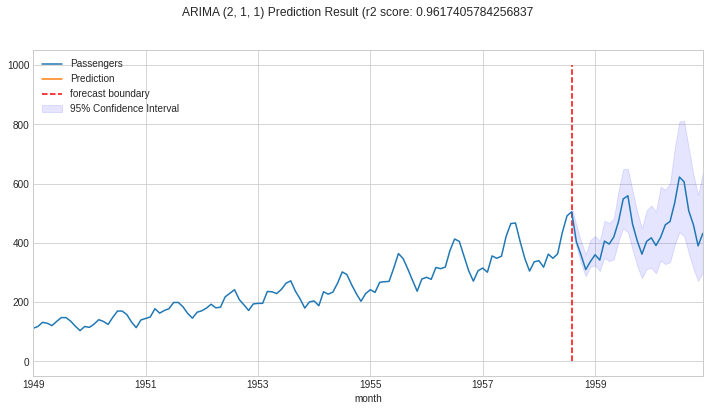

In [40]:
pred = opt_model_fit.get_forecast(len(log_test_data))
predicted_values = np.exp(pred.predicted_mean)
pred_lb = np.exp(pred.conf_int()[:,0])
pred_ub = np.exp(pred.conf_int()[:,1])

pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
data.plot(ax=ax)
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

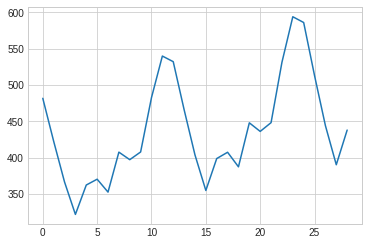

In [41]:
plt.plot(predicted_values)